In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df1=pd.read_excel("data.xlsx", "Sheet1")
df2=pd.read_excel("data.xlsx", "Sheet2")
df3=pd.read_excel("data.xlsx", "Sheet3")
df4=pd.read_excel("data.xlsx", "Sheet4")
df5=pd.read_excel("data.xlsx", "Sheet5")

In [3]:
dataframe = pd.concat([df1, df2, df3, df4, df5], ignore_index=True, axis=0)
dataframe.shape

(47840, 5)

In [4]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,47840.0,19.651231,7.452162,1.81,13.5100,20.345,25.72,37.11
V,47840.0,54.305804,12.707362,25.36,41.7400,52.080,66.54,81.56
AP,47840.0,1013.259078,5.938535,992.89,1009.1000,1012.940,1017.26,1033.30
RH,47840.0,73.308978,14.599658,25.56,63.3275,74.975,84.83,100.16
PE,47840.0,454.365009,17.066281,420.26,439.7500,451.550,468.43,495.76


In [5]:
std_PE=17.066281
mean_PE=454.365009

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47840 entries, 0 to 47839
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      47840 non-null  float64
 1   V       47840 non-null  float64
 2   AP      47840 non-null  float64
 3   RH      47840 non-null  float64
 4   PE      47840 non-null  float64
dtypes: float64(5)
memory usage: 1.8 MB


In [7]:
dataframe.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [8]:
dataframe=(dataframe-dataframe.mean())/dataframe.std()
dataframe.head()

,AT,V,AP,RH,PE
0,-0.629513,-0.987286,1.820469,-0.009519,0.521203
1,0.741901,0.681038,1.141851,-0.974610,-0.585658
2,-1.951277,-1.173005,-0.185076,1.289826,2.003658
3,0.162204,0.237201,-0.508388,0.228158,-0.462023
4,-1.185056,-1.322525,-0.678463,1.596683,1.144654


In [9]:
df_train, df_test = train_test_split(dataframe, test_size=0.2, random_state=50)
df_train, df_valid = train_test_split(dataframe, test_size=0.2, random_state=50)

In [10]:
df_train.head()

,AT,V,AP,RH,PE
18135,0.568797,0.784128,0.018678,0.130895,-0.207720
30673,0.362146,-0.226310,-0.323157,0.275419,-0.528821
24245,-2.183424,-1.154119,-0.380410,0.541864,2.024752
37299,1.547037,1.159501,-0.853591,-1.615721,-0.767889
47071,-1.401101,-1.147823,1.057655,0.077469,1.441145


In [11]:
df_valid.head()

,AT,V,AP,RH,PE
43479,0.776791,1.248426,-2.123264,1.272703,-1.250712
36070,1.271949,0.964338,-1.116282,-1.401333,-0.882149
39690,1.159230,0.594474,-0.233909,-0.625972,-0.944260
39970,-0.535580,-1.019551,-1.949821,0.887077,0.539367
46935,0.375565,0.744781,0.220748,0.967901,-0.592104


In [12]:
df_test.head()

,AT,V,AP,RH,PE
43479,0.776791,1.248426,-2.123264,1.272703,-1.250712
36070,1.271949,0.964338,-1.116282,-1.401333,-0.882149
39690,1.159230,0.594474,-0.233909,-0.625972,-0.944260
39970,-0.535580,-1.019551,-1.949821,0.887077,0.539367
46935,0.375565,0.744781,0.220748,0.967901,-0.592104


In [13]:
scaler = StandardScaler()
df_train = scaler.fit_transform(df_train)
df_valid = scaler.transform(df_valid)
df_test = scaler.transform(df_test)

In [14]:
X_train = df_train[:,0:4]
Y_train = df_train[:,4]

X_valid = df_valid[:,0:4]
Y_valid = df_valid[:,4]

X_test = df_test[:,0:4]
Y_test = df_test[:,4]

In [15]:
X_train.shape, X_valid.shape, X_test.shape

((38272, 4), (9568, 4), (9568, 4))

In [16]:
X_train = Variable(torch.Tensor(X_train))
Y_train = Variable(torch.Tensor(Y_train))

X_valid = Variable(torch.Tensor(X_valid))
Y_valid = Variable(torch.Tensor(Y_valid))

X_test = Variable(torch.Tensor(X_test))
Y_test = Variable(torch.Tensor(Y_test))

In [17]:
print(X_train.shape, Y_train.shape, X_valid.shape, Y_valid.shape,  X_test.shape, Y_test.shape)

torch.Size([38272, 4]) torch.Size([38272]) torch.Size([9568, 4]) torch.Size([9568]) torch.Size([9568, 4]) torch.Size([9568])


In [18]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


# Model_1

Model Defination

In [19]:
model1 = nn.Sequential(
    nn.Linear(4,256,dtype=None),
    nn.ReLU(),
    nn.Linear(256,128,dtype=None),
    nn.Sigmoid(),
    nn.Linear(128,32,dtype=None),
    nn.ReLU(),
    nn.Linear(32,1,dtype=None),
)
model1.to(device)

Sequential(
  (0): Linear(in_features=4, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=128, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=1, bias=True)
)

Training the Model

In [20]:
optimizer=torch.optim.Adam(model1.parameters(),lr=0.01)
for epoch in range(100):
    ypred=torch.squeeze(model1(X_train))
    Loss=F.mse_loss(ypred,Y_train)
    optimizer.zero_grad()
    Loss.backward()
    optimizer.step()
    print("Loss = ", Loss)

Loss =  tensor(1.0250, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.7711, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.4664, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.2113, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.1354, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.2043, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.2131, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.1928, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.1438, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.1120, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.1220, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.1464, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.1543, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.1421, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.1251, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.1124, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.1058, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.1036, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.1053, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.1055, grad_fn=

Applying Model on Validation Data

In [21]:
pred=torch.squeeze(model1(X_valid))
Loss = F.mse_loss(pred,Y_valid)
print(Loss) 

tensor(0.0558, grad_fn=<MseLossBackward0>)


# Model_2 

Model Defination

In [22]:
model2=nn.Sequential(
    nn.Linear(4,64,dtype=None),
    nn.ReLU(),
    nn.Linear(64,32,dtype=None),
    nn.ReLU(),
    nn.Linear(32,1,dtype=None),
)
model2.to(device)

Sequential(
  (0): Linear(in_features=4, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=1, bias=True)
)

Training the Model

In [23]:
optimizer=torch.optim.Adam(model2.parameters(),lr=0.01)
for epoch in range(100):
    ypred=torch.squeeze(model2(X_train))
    Loss=F.mse_loss(ypred,Y_train)
    optimizer.zero_grad()
    Loss.backward()
    optimizer.step()
    print("Loss = ", Loss)

Loss =  tensor(0.9798, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.5947, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.3281, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.1821, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.1710, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.1596, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.1608, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.1682, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.1524, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.1155, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.0840, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.0778, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.0916, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.1028, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.1016, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.0962, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.0939, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.0920, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.0858, grad_fn=<MseLossBackward0>)
Loss =  tensor(0.0764, grad_fn=

Applying Model on Validation Data

In [24]:
pred=torch.squeeze(model2(X_valid))
Loss = F.mse_loss(pred,Y_valid)
print(Loss)

tensor(0.0583, grad_fn=<MseLossBackward0>)


#  Since the error_Model1 < error_Model2, hence we will proceed with Model1

Predicting the PE of Testing Data

Mean Squared Error Observed: tensor(16.2665, grad_fn=<DivBackward0>)


(415.0, 505.0)

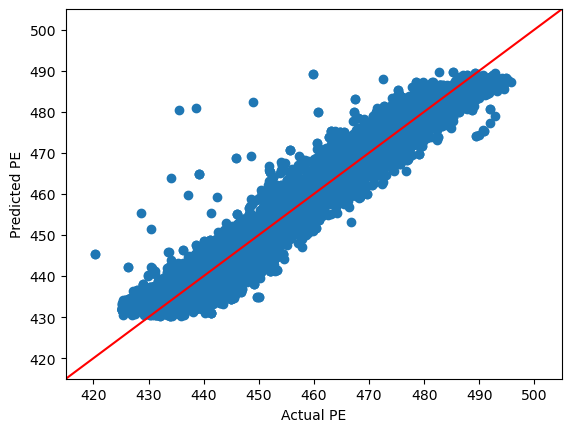

In [25]:
prediction=[]
true_val=[]
Total_Loss=0
for i in range(len(X_test)):
    pred=model1(X_test[i])
    pred=pred*std_PE + mean_PE
    true_value=Y_test[i]*std_PE +mean_PE
    Loss = F.mse_loss(torch.squeeze(pred),true_value)
    Total_Loss+=Loss
    prediction.append(pred.tolist())
    true_val.append(true_value.item())
    
print("Mean Squared Error Observed:", Total_Loss/len(X_test))
plt.scatter(true_val,prediction)
plt.xlabel('Actual PE')
plt.ylabel('Predicted PE')

plt.plot([415,505],[415,505],'r-')
plt.xlim(415,505)
plt.ylim(415,505)

# The total Mean Squared Error on the Test Dataset is 16.2665